<a href="https://colab.research.google.com/github/yangchang-n/Src-sepd-Note-Generator/blob/main/ML/preprocess_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

In [ ]:
FIG_SIZE = (15, 10)
file = '' # Music file path
bpm = 200 # BPM of music
sample_rate = bpm * 100

In [ ]:
# Display Waveform
signal, sample_rate = librosa.load(file, sr = sample_rate) # If bpm == 200, sample_rate would be 20,000Hz in default setting
print('signal shape : ', signal.shape)
print('length : ', signal.shape[0]/float(sample_rate), 'secs')

signal shape :  (5200980,)
length :  260.049 secs


Text(0.5, 1.0, 'Waveform')

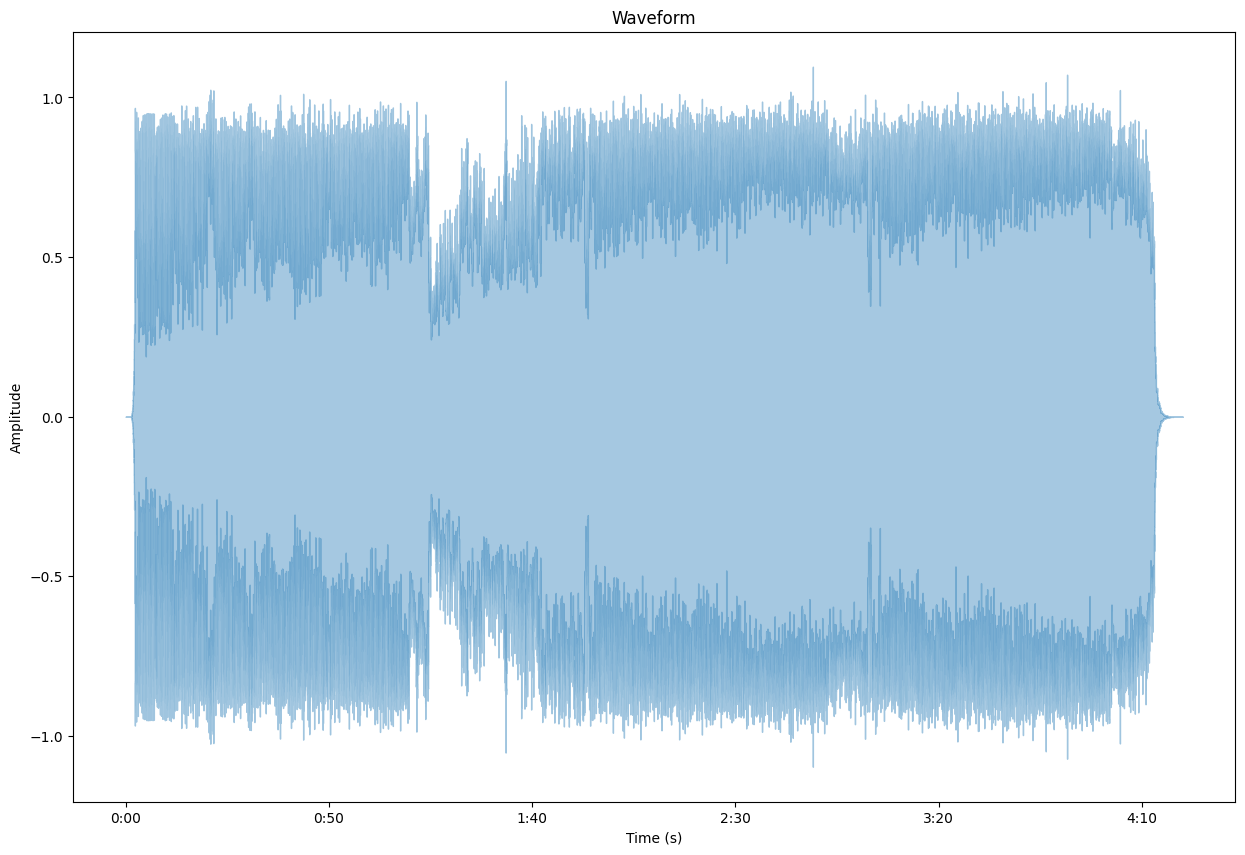

In [ ]:
plt.figure(figsize = FIG_SIZE)
librosa.display.waveshow(signal, sr = sample_rate, alpha = 0.4)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')

In [ ]:
# FFT -> Power Spectrum
fft = np.fft.fft(signal)
spectrum = np.abs(fft)
f = np.linspace(0, sample_rate, len(spectrum))
left_spectrum = spectrum[ : int(len(spectrum) / 2)]
left_f = f[ : int(len(spectrum) / 2)]

print('fft shape : ', fft.shape)
print('spectrum shape : ', spectrum.shape)
print('f shape : ', f.shape)
print('left_spectrum shape : ', left_spectrum.shape)
print('left_f shape : ', left_f.shape)

fft shape :  (5200980,)
spectrum shape :  (5200980,)
f shape :  (5200980,)
left_spectrum shape :  (2600490,)
left_f shape :  (2600490,)


Text(0.5, 1.0, 'Power spectrum')

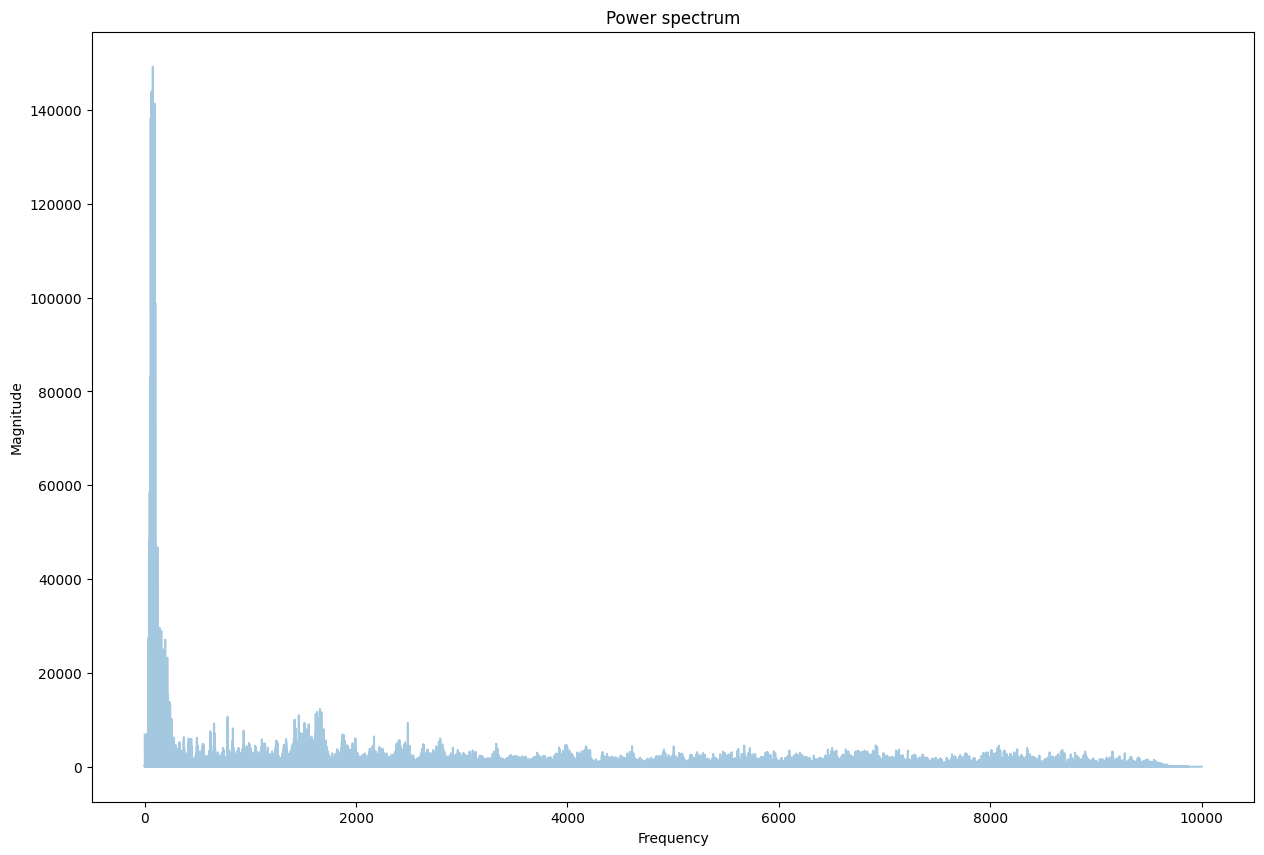

In [ ]:
plt.figure(figsize = FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha = 0.4)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Power spectrum')

In [ ]:
# STFT -> Spectrogram
n_fft = int(60 / bpm * sample_rate) # Window in num of samples
hop_length = int(n_fft / 4) # In num of samples

# Calculate duration hop length and window in seconds
hop_length_duration = float(hop_length) / sample_rate
n_fft_duration = float(n_fft) / sample_rate

print("STFT hop length duration is : {}s".format(hop_length_duration))
print("STFT window duration is : {}s".format(n_fft_duration))

STFT hop length duration is : 0.075s
STFT window duration is : 0.3s


In [ ]:
# Perform STFT
stft = librosa.stft(signal, n_fft = n_fft, hop_length = hop_length)

# Calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)

Text(0.5, 1.0, 'Spectrogram')

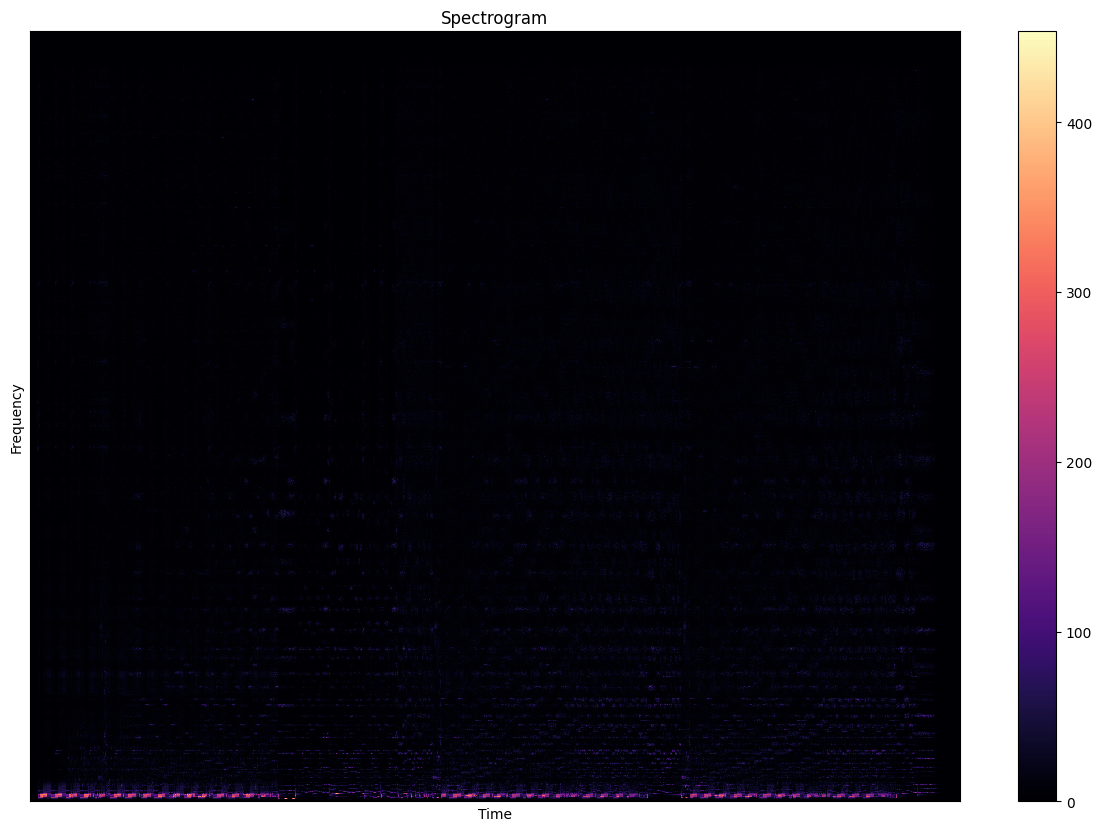

In [ ]:
# Display spectrogram
plt.figure(figsize = FIG_SIZE)
librosa.display.specshow(spectrogram, sr = sample_rate, hop_length = hop_length)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.title('Spectrogram')

Text(0.5, 1.0, 'Spectrogram (dB)')

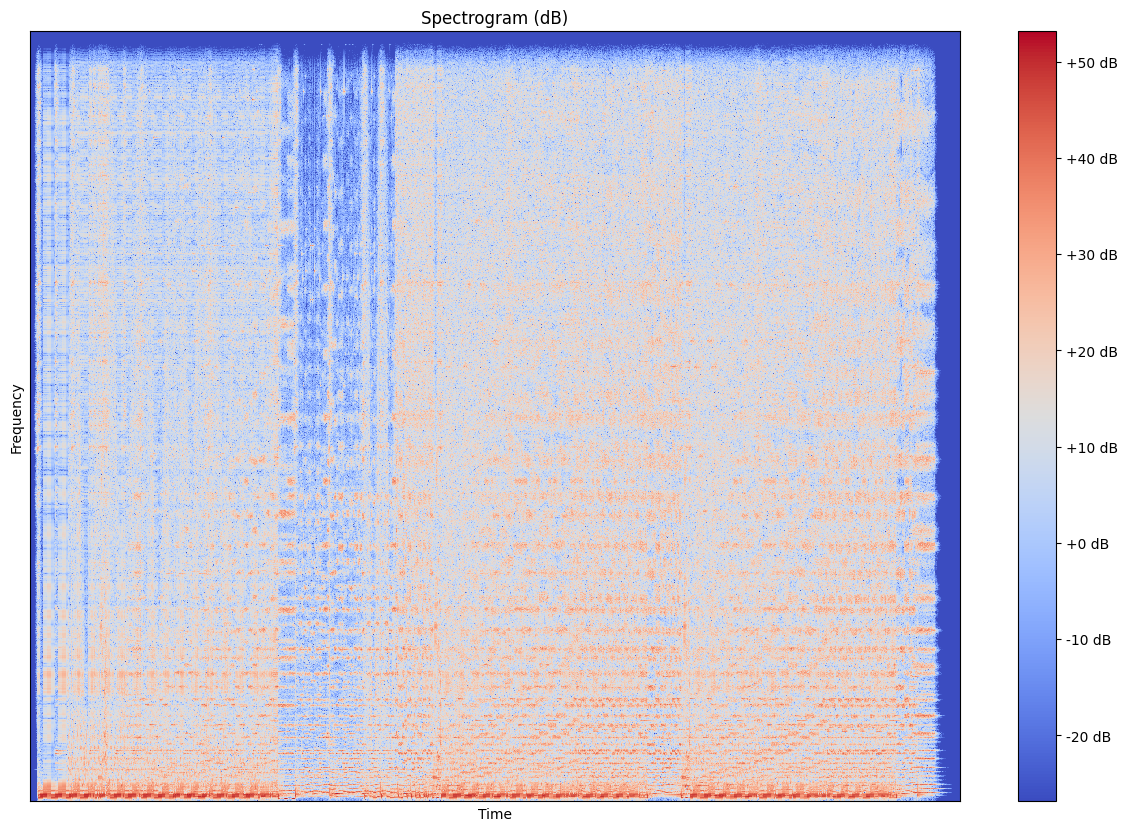

In [ ]:
# Cast amplitude to decibels
# Apply logarithm to cast amplitude to decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize = FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr = sample_rate, hop_length = hop_length)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar(format = '%+2.0f dB')
plt.title('Spectrogram (dB)')

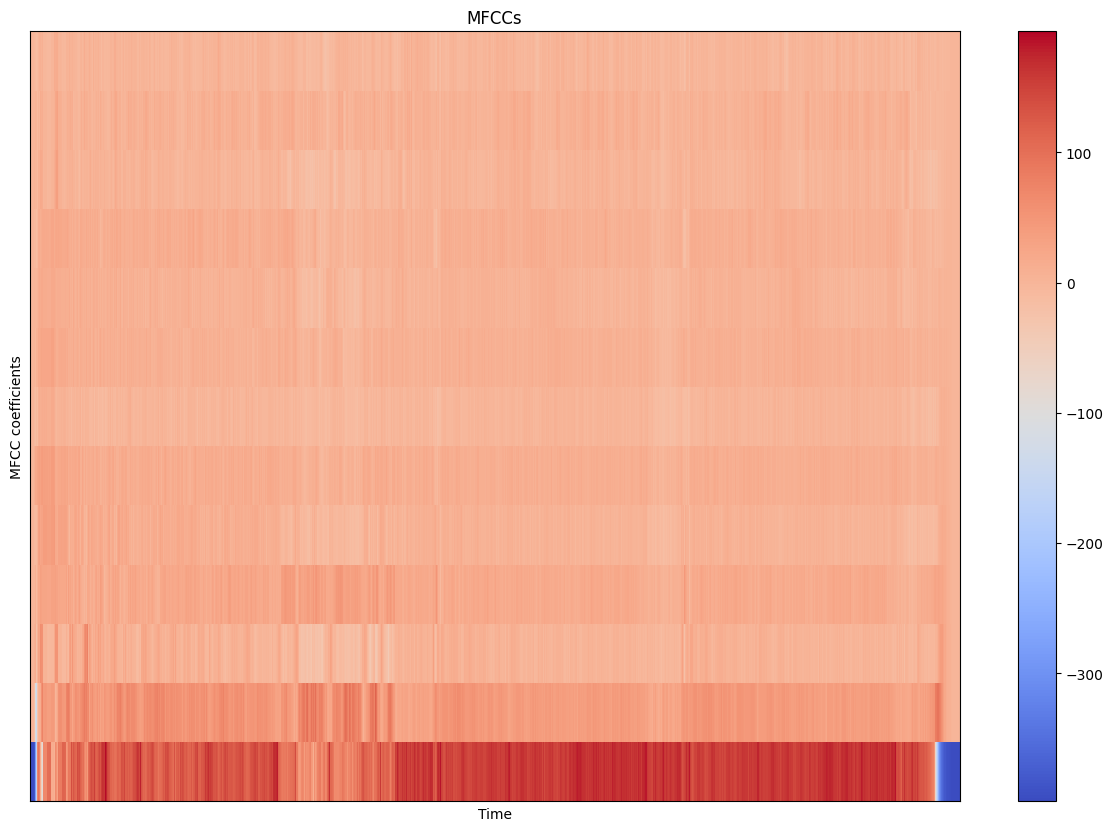

In [ ]:
# MFCCs
# Extract 13 MFCCs
MFCCs = librosa.feature.mfcc(y = signal, sr = sample_rate, n_fft = n_fft, hop_length = hop_length, n_mfcc = 13)

# Display MFCCs
plt.figure(figsize = FIG_SIZE)
librosa.display.specshow(MFCCs, sr = sample_rate, hop_length = hop_length)
plt.xlabel('Time')
plt.ylabel('MFCC coefficients')
plt.colorbar()
plt.title('MFCCs')
plt.show()